In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv(r'C:\JupyterNotebook\DataSet\Olympic Hero.csv')
data.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [3]:
data.rename(columns = {'Total':'Total_Medals'}, inplace = True)
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [4]:
#Creating new column 'Better_Event'
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])

In [5]:
#Finding the value with max count in 'Better_Event' column
better_event=data['Better_Event'].value_counts().index.values[0]

#Printing the better event
print('Better_Event=', better_event)

Better_Event= Summer


In [6]:
#Subsetting the dataframe
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

In [7]:
#Dropping the last row
top_countries=top_countries[:-1]

In [8]:
#Function for top 10
def top_ten(data, col):
    
    #Creating a new list
    country_list=[]
    
    #Finding the top 10 values of 'col' column
    country_list= list((data.nlargest(10,col)['Country_Name']))
    
    #Returning the top 10 list
    return country_list

In [9]:
#Calling the function for Top 10 in Summer
top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 



In [10]:
#Calling the function for Top 10 in Winter
top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")

Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 



In [11]:
#Calling the function for Top 10 in both the events
top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 



In [12]:
#Extracting common country names from all three lists
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))

print('Common Countries :\n', common, "\n")

Common Countries :
 ['United States', 'Germany', 'Sweden', 'Soviet Union'] 



In [13]:
#For Summer
#Creating the dataframe for Summer event
summer_df= data[data['Country_Name'].isin(top_10_summer)]

Text(0, 0.5, 'Total Medals')

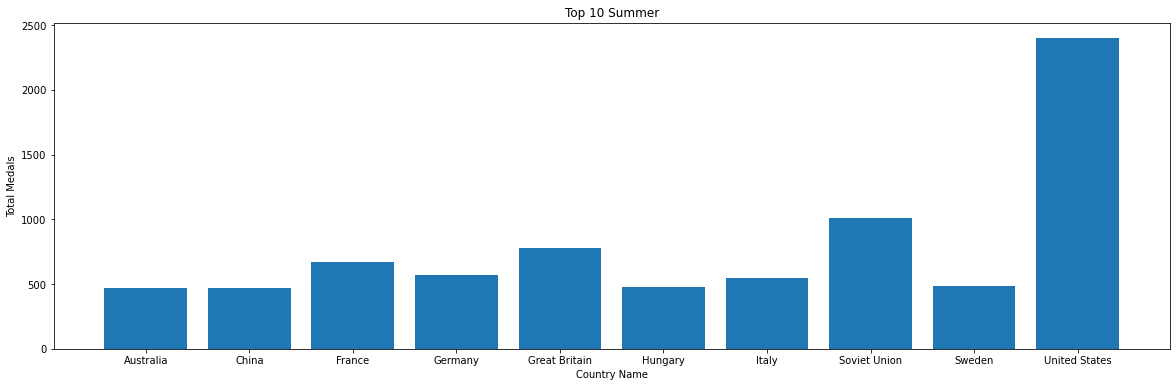

In [14]:
#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])
plt.title('Top 10 Summer')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

In [15]:
#For Winter

#Creating the dataframe for Winter event
winter_df=data[data['Country_Name'].isin(top_10_winter)]

Text(0, 0.5, 'Total Medals')

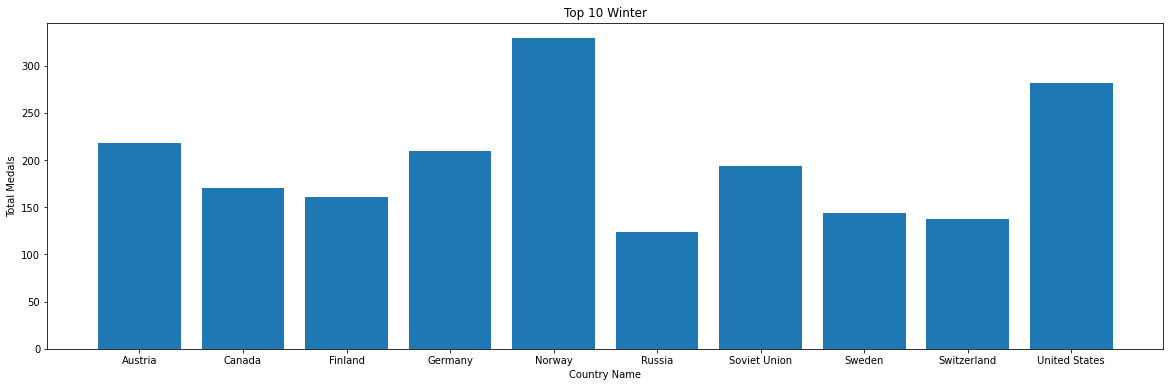

In [16]:
#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'])
plt.title('Top 10 Winter')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

In [17]:
#For both the events

#Creating the dataframe for both the events
top_df=data[data['Country_Name'].isin(top_10)]

Text(0, 0.5, 'Total Medals')

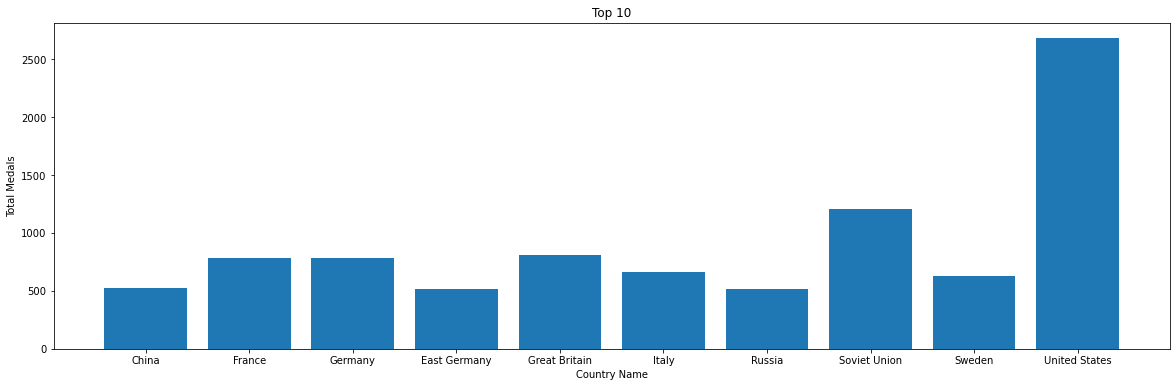

In [18]:
#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'])
plt.title('Top 10')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')

In [19]:
#For Summer List

#Creating new column 'Golden_Ratio'
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
#Finding the max value of 'Golden_Ratio' column
summer_max_ratio=max(summer_df['Golden_Ratio'])

In [21]:
#Finding the country assosciated with the max value of 'Golden_Ratio' column
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )

Top Summer Country: China  with a ratio of 0.42


In [22]:
#For Winter List

#Creating new column 'Golden_Ratio'
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
#Finding the max value of 'Golden_Ratio' column
winter_max_ratio=max(winter_df['Golden_Ratio'])

In [24]:
#Finding the country assosciated with the max value of 'Golden_Ratio' column
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )

Top Winter Country: Soviet Union  with a ratio of 0.40


In [25]:
#For Overall List

#Creating new column 'Golden_Ratio'
top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
#Finding the max value of 'Golden_Ratio' column
top_max_ratio=max(top_df['Golden_Ratio'])

In [27]:
#Finding the country assosciated with the max value of 'Golden_Ratio' column
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']
print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Country: China  with a ratio of 0.40


In [28]:
#Removing the last column of the dataframe
data_1=data[:-1]

In [29]:
#Creating a new column 'Total_Points'
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Finding the maximum value of 'Total_Points' column
most_points=max(data_1['Total_Points'])

In [31]:
#Finding the country assosciated with the max value of 'Total_Column' column
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


In [32]:
#Subsetting the dataframe
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]

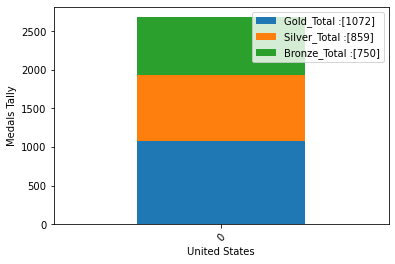

In [33]:
#Plotting bar plot
best.plot.bar(stacked=True)
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)

#Updating the graph legend
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))